In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_curve, recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import joblib

In [3]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df = df[['survived', 'pclass', 'sex', 'age', 'fare']]


In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)


In [6]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


In [7]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}


In [12]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}


In [16]:
X.isnull().sum()


,0
pclass,0
sex,0
age,177
fare,0


In [17]:
# Fill missing values for numerical columns
X['age'].fillna(X['age'].median(), inplace=True)
X['fare'].fillna(X['fare'].median(), inplace=True)


/tmp/ipython-input-2982269433.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
/tmp/ipython-input-2982269433.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
np.isnan(X_train_scaled).sum()


np.int64(0)

In [24]:
results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })


In [25]:
print(accuracy_score, precision_score, recall_score, f1_score)


<function accuracy_score at 0x7cdd34246020> <function precision_score at 0x7cdd34247100> <function recall_score at 0x7cdd34247240> <function f1_score at 0x7cdd342468e0>


In [28]:
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.793296,0.768116,0.716216,0.741259
1,Decision Tree,0.731844,0.662500,0.716216,0.688312
2,Random Forest,0.793296,0.760563,0.729730,0.744828
3,SVM,0.815642,0.815385,0.716216,0.762590


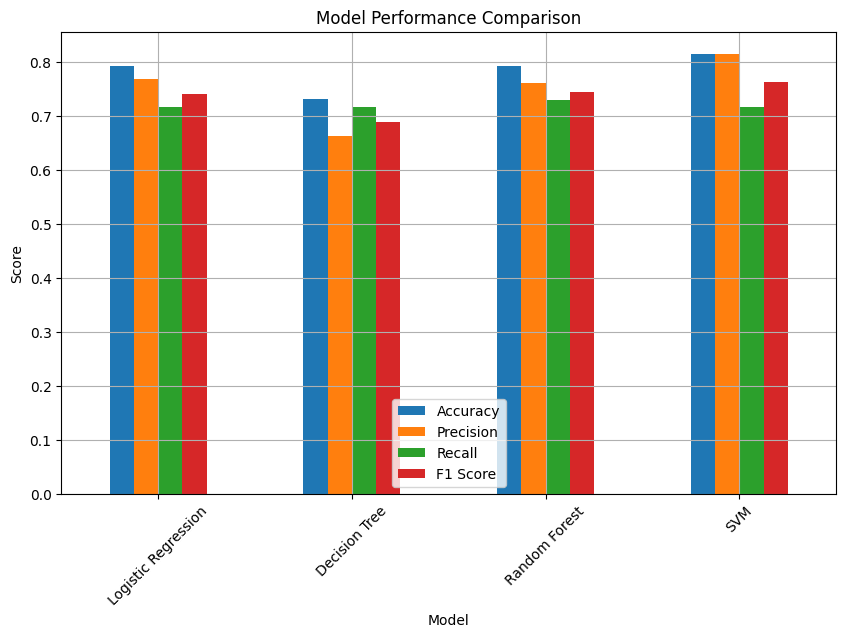

In [29]:
results_df.set_index("Model").plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [30]:
results_df.head()


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.793296,0.768116,0.716216,0.741259
1,Decision Tree,0.731844,0.662500,0.716216,0.688312
2,Random Forest,0.793296,0.760563,0.729730,0.744828
3,SVM,0.815642,0.815385,0.716216,0.762590


In [32]:
results_df.sort_values(by="F1 Score", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score
3,SVM,0.815642,0.815385,0.716216,0.762590
2,Random Forest,0.793296,0.760563,0.729730,0.744828
0,Logistic Regression,0.793296,0.768116,0.716216,0.741259
1,Decision Tree,0.731844,0.662500,0.716216,0.688312


In [33]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

joblib.dump(best_model, "best_model.pkl")


['best_model.pkl']

## SUBMISSION

“I compared multiple classification algorithms on the Titanic dataset using consistent preprocessing and train-test split. Models were evaluated using accuracy, precision, recall, and F1-score. Random Forest performed best and was selected based on generalization performance.”